In [2]:
# DBSCAN

# Unsupervised method that clusters core samples (dense areas of a dataset) and denotes
# non-core samples (sparse portions of the dataset)

# DBSCAN can be used to identify collective outliers

# Outliers should make uo <= 5% of the total observations.
# Adjust model parameters accordingly

In [3]:
# Important DBSCAN model parameters

# eps (maximum distance b/w two samples for them to be clustered in the same neighbourhood. Ex: 0.1 )
# min_samples (minimum number of samples in the neighbourhood for a data point to qualify as a core point)

In [5]:
# DBSCAN clustering to identify outliers

import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn.cluster import DBSCAN
from collections import Counter

In [8]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')

In [9]:
# Training the model to identify outliers

address = './Data/iris.data.csv'
df = pd.read_csv(address)

df.columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']

In [18]:
data = df.iloc[:,0:4].values
target = df.iloc[:,4].values
df[:5]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,4.9,3.0,1.4,0.2,setosa
1,4.7,3.2,1.3,0.2,setosa
2,4.6,3.1,1.5,0.2,setosa
3,5.0,3.6,1.4,0.2,setosa
4,5.4,3.9,1.7,0.4,setosa


In [19]:
model = DBSCAN(eps = 0.8, min_samples = 19).fit(data)
print(model)

DBSCAN(eps=0.8, min_samples=19)


In [20]:
# Visualize your data

outliers_df = pd.DataFrame(data)
print(Counter(model.labels_))

print(outliers_df[model.labels_==-1])

Counter({1: 94, 0: 49, -1: 6})
       0    1    2    3
97   5.1  2.5  3.0  1.1
104  7.6  3.0  6.6  2.1
116  7.7  3.8  6.7  2.2
117  7.7  2.6  6.9  2.3
121  7.7  2.8  6.7  2.0
130  7.9  3.8  6.4  2.0


Text(0.5, 1.0, 'DBSCAN for outlier Detection')

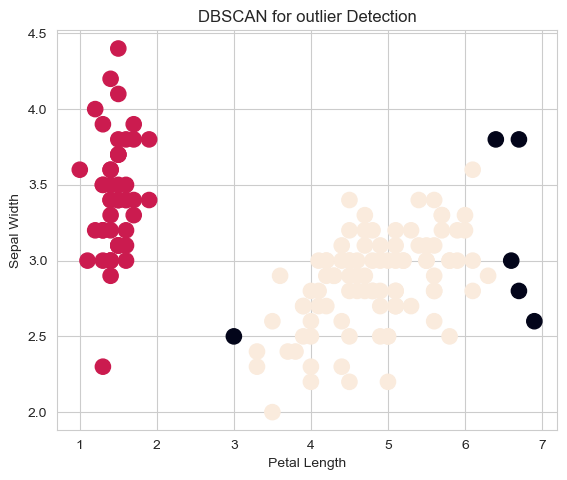

In [22]:
fig = plt.figure()

ax = fig.add_axes([.1,.1,1,1])
colors = model.labels_

ax.scatter(data[:,2], data[:,1], c=colors,s=120)

ax.set_xlabel('Petal Length')
ax.set_ylabel('Sepal Width')
plt.title('DBSCAN for outlier Detection')